# A) API Zugriff im lokalen Netzwerk 

# A) Das sind die Inhalte:
## Sensor- Werte auslesen und speichern
1. request an das REST API senden und "return-object" analysieren
2. dictionary mit json.loads aus dem "return-object" erzeugen
3. dekodierte Sensor - Messwerte mit "print" ausgeben
4. Messwerte als .json file ablegen
5. Messwerte fortlaufend in einem .db file mitschreiben

# B) Das ist dein Arbeitsauftrag: 
## ->Arbeitsaufgabe 1: "Dummy - Werte speichern"

### Abgabe als Link zu deinem Github repository: 
1. initialisiere ein neues .git repository und lege das "b_nachname_dummy_source" - file darin ab. Der Source-Code soll nur die notwendigen Bestandteile enthalten, um das geforderte .json und .db file anzulegen. Bitte kommentiere den Source-Code und alle individuellen Anpassungen! Füge einen Screenshot des erzeugten JSON - Files und einen Screenshot der geöffneten Tabelle (z.B. in DB - Browser) genau dort ein, wo sie im Source-Code erzeugt werden.
2. speichere die individuell angepassten dummy - Werte in einem .json File "b_nachname_dummywerte.json"
3. speichere die individuell angepassten dummy - Werte in einer sqlite Datenbank "b_nachname_dummywerte.db"
4. füge das .json und .db file deinem git repository hinzu und führe ein commit durch. "-m "Arbeitsaufgabe Teil 1 Nachname"

## ->Arbeitsaufgabe 2: "Sensor - Werte speichern"
Das Abfrageintervall ist eine Minute. Die Dauer der Aufzeichnung ist vor dem Start der Aufzeichnung
individuell mit dem Lehrer zu vereinbaren.

### TODO: *Ersetze die "dummy-Werte" durch echte Sensordaten. Speichere die Werte für Luftfeuchtigkeit, Temperatur und Helligkeit:*
### Abgabe als Link zu deinem Github repository: 
1. initialisiere ein neues .git repository und lege das "source" - file darin ab. Der Source-Code soll im Unterschied zu Arbeitsaufgabe 1 alle Code-Bestandteile von A1) bis A5) in ausgeführter Form beinhalten und zusätzlich die erforderlichen individuellen Anpassungen inkl. deiner Kommentare. Bitte füge einen Screenshot des erzeugten JSON - Files und einen Screenshot der geöffneten Tabelle (z.B. in DB - Browser) genau dort ein, wo sie im Source-Code erzeugt werden.
2. speichere die Sensor - Werte in einem .json File "b_nachname_sensorwerte.json"
3. speichere die Sensor - Werte in einer sqlite Datenbank "b_nachname_sensorwerte.db"
4. füge das .json und .db file deinem git repository hinzu und führe ein commit durch. "-m "Arbeitsaufgabe Teil 2 Nachname"



 

# Input zu Arbeitsaufgabe 1 und 2
### ACHTUNG: Die dummy-Werte für Arbeitsaufgabe 1 müssen individuell z.B. mittels Zufallsgenerator erzeugt werden!
### A1) request an das REST API senden und "return-object" analysieren

In [1]:
import requests
import json
#Die Authentifizierung wird im lokalen Netzwerk noch nicht benötigt, aber im nächsten Schritt
#from requests.auth import HTTPBasicAuth


TODO: 1 Schritt: IP Adresse des Sensors identifizieren! Dazu das Programm "Advanced IP Scanner " installieren
um die IP - Adressen aller Computer im Netzwerk abzufragen. 
Um einen geeigente IP - Range festzulegen, cmd starten - eigene IP Adresse (am Kabel abfragen) und IP - 100 bis IP + 100 scannen. 
Das Gerät ist ein Raspberry Pi und sollte im NW anhand des Namens entsprechend erkannt werden. 

In [3]:
hum_value=#Dummy wert erzzeugen

ConnectionError: HTTPConnectionPool(host='192.168.68.112', port=8080): Max retries exceeded with url: /rest/items/ZWaveNode019WohnzimmerZW100Multisensor6_Sensorrelativehumidity (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000029F35336F10>: Failed to establish a new connection: [WinError 10060] Ein Verbindungsversuch ist fehlgeschlagen, da die Gegenstelle nach einer bestimmten Zeitspanne nicht richtig reagiert hat, oder die hergestellte Verbindung war fehlerhaft, da der verbundene Host nicht reagiert hat'))

In [36]:
my_content=hum_value.content

### A2) dictionary mit json.loads aus dem "return-object" erzeugen

### A3) dekodierte Sensor - Messwerte mit "print" ausgeben

### A4) Input Arbeitsaufgabe 1/ Messwerte als .json file speichern

https://docs.python.org/3/library/json.html
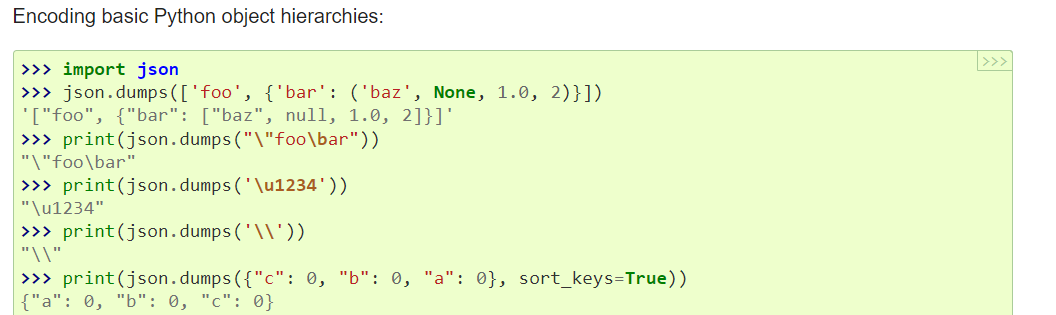

In [9]:
# in order to store the values as a json file, you might create and open a file, 
# continuously get the current sensor readings and finally store them in the json - file
# the code - snippet doesn't meet the requirements of the assignment in terms of time- interval, 
# sensor - readings, etc.
import random
import time
import pandas as pd
my_values_df = pd.DataFrame(data=None,columns=['timestamp','temperature','humidity','brightness'])
my_timestamp = round(time.time())
for my_counter in range(10):
    time.sleep(1)
    my_timestamp = round(time.time())
    print(my_timestamp)
    #hum_value = content_dict['state']
    act_temp = round(random.uniform(-30,50),2)
    act_hum = round(random.uniform(10,90),2)
    act_bright = round(random.uniform(0,65000),2) 
    input_values = [my_timestamp,act_temp,act_hum,act_bright]
    my_values_df.loc[my_counter]=input_values

filename = "a_sensor_values"
with open(filename, 'w+') as jsonfile:
    my_values_df.to_json(jsonfile)
    

1682667252
1682667253
1682667254
1682667255
1682667256
1682667257
1682667258
1682667259
1682667260
1682667261


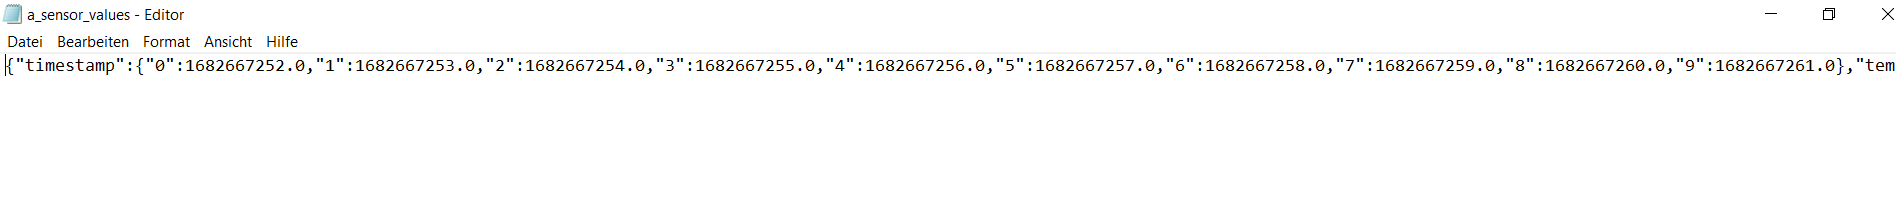

In [4]:
#retrieve values from .json file via 
pd.read_json(filename)

NameError: name 'pd' is not defined

### A5) Input Arbeitsaufgabe 1/ Messwerte fortlaufend in einem .db file mitschreiben

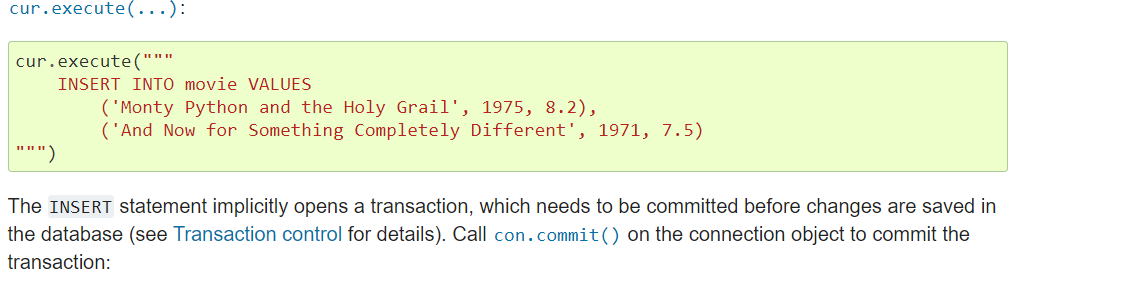

In [10]:
!pip install sqlite3
import sqlite3

#cnx = sqlite3.connect(':memory:') alternative in memory database
sqlite_db = 'a_sensor_values.db' # String for creating DB in specified directory
print(sqlite_db)

conn=sqlite3.connect(sqlite_db) # Creates sqlite Database - check in your file explorer
cur=conn.cursor()
cur.execute('''DROP TABLE IF EXISTS sensor_values''')
cur.execute('''CREATE TABLE sensor_values(timestamp NUMERIC,temperature NUMERIC, humidity NUMERIC, brightness NUMERIC);''')

for my_counter in range(10):
    time.sleep(1)
    my_timestamp = round(time.time())
    print(my_timestamp)
    act_temp =round(random.uniform(-30,50),2)
    act_hum =round(random.uniform(10,90),2)
    act_bright =round(random.uniform(0,65000),2) 
# CREATE INSERT STATEMENT
    execution_string = f"INSERT INTO sensor_values VALUES ({my_timestamp}, {act_temp}, {act_hum}, {act_bright})"
    print(execution_string)
    cur.execute(execution_string)
    conn.commit()

ERROR: Could not find a version that satisfies the requirement sqlite3
ERROR: No matching distribution found for sqlite3


a_sensor_values.db
1682667733
INSERT INTO sensor_values VALUES (1682667733, 38.08, 30.65, 50229.09)
1682667734
INSERT INTO sensor_values VALUES (1682667734, -8.75, 40.45, 9207.59)
1682667735
INSERT INTO sensor_values VALUES (1682667735, -13.67, 55.1, 47509.41)
1682667736
INSERT INTO sensor_values VALUES (1682667736, -6.87, 80.6, 29354.0)
1682667737
INSERT INTO sensor_values VALUES (1682667737, 23.51, 81.79, 27604.77)
1682667738
INSERT INTO sensor_values VALUES (1682667738, 19.97, 65.07, 5813.44)
1682667739
INSERT INTO sensor_values VALUES (1682667739, -11.91, 15.57, 8174.64)
1682667740
INSERT INTO sensor_values VALUES (1682667740, 44.18, 19.02, 36421.08)
1682667741
INSERT INTO sensor_values VALUES (1682667741, -19.13, 60.04, 18260.28)
1682667742
INSERT INTO sensor_values VALUES (1682667742, 40.24, 54.31, 32607.82)


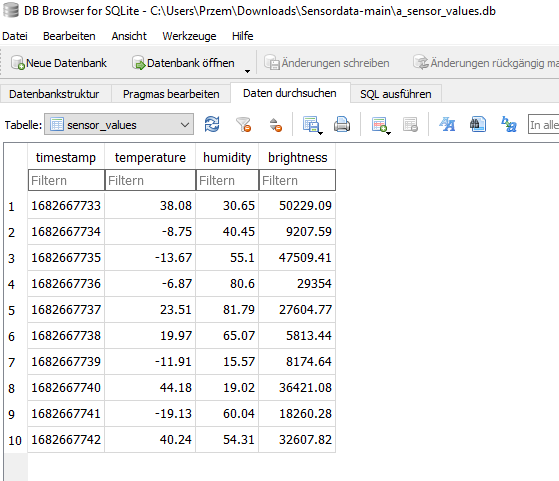

In [ ]:
# fetch values directly from db cursor
cur.execute("SELECT * FROM sensor_values")
print(cur.fetchall())

In [ ]:
# retrieve values via pd library from local database
pd.read_sql("SELECT * FROM sensor_values;", conn)